# TensorFlow & Keras - Basics of Deep Learning

### Most importantly... resources

https://www.tensorflow.org/api_docs

https://keras.io/

https://www.tensorflow.org/tutorials/

https://www.google.com

## TF overview

* #### "End-to-end machine learning platform" 

    - Not the only one! Check out PyTorch, Theano, Cognitive Toolkit.
    - Used to just be deep learning - they've expanded recently
   
* #### Integrates with high-level APIs like Keras
* #### Plays nice with Pandas
* #### Makes deep learning *fast* and *easy* *
    *<sup>"easy"</sup>

## Tasks for TensorFlow:

* #### Regression
    - Predict house prices
    - Predict drug metabolic rates
    - Predict stock trends *
    
    *<sup>this is super hard</sup>
    
    

* #### Classification
    - Cat or dog?
    - Malignant or benign cancer from images
    ![](media/dr.png)
    <span style="font-size:0.75em;">Google AI Blog: Diabetic Retinopathy</span>



* #### Dimensionality reduction
    - Visualize high-dimensional data in 2 or 3-D space
    - Compress representations for successive ML



* #### Generative models
    - Create new molecules with desirable properties
    - Artificially enhance image resolution
    ![](media/molecular_gan.png)
    <span style="font-size:0.75em;">Kadurin et al., 2017</span>


* #### Reinforcement learning
    - Can't beat your friends at chess? Make your computer do it



* #### Much more...
    - Generic math
    - Probabilistic programming with TFP
    - Automatic differentiation
    - ...


## Let's Regress

### Imports!

In [1]:
import numpy as np
import pandas as pd

Name a more iconic duo, I'll wait

#### New imports -- TF and Keras

In [2]:
import keras
import tensorflow as tf

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Check our versions for good measure -- these programs may have very different behavior version-to-version

In [3]:
print(keras.__version__)
print(tf.__version__)

2.2.4
1.12.0


#### Loading in housing data as with SKLearn

In [4]:
data = pd.read_csv('kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


Remember, you're better off using a simple model that gives a pretty good answer than a super complicated model that gives a slightly better result.

In [5]:
#Intro simple model - super similar to what we did in sklearn
column_selection = ["bedrooms","bathrooms","sqft_living","sqft_lot",
                    "floors","condition","grade","sqft_above",
                    "sqft_basement","sqft_living15","sqft_lot15",
                    "lat", "long","yr_built","yr_renovated","waterfront"]

selected_feature = np.array(data[column_selection])
price = np.array(data["price"])
selected_feature_train = selected_feature[:20000]
price_train = price[:20000]

selected_feature_test = selected_feature[20000:]
price_test = price[20000:]

In [6]:
def score(y,y_pred):
    return np.mean(np.abs(y-y_pred)/y)

In [7]:
model = keras.Sequential()
#currently, our model has nothing in it

In [8]:
input_len = len(column_selection) #how many features are in our vector
model.add(keras.layers.Dense(50, input_dim=input_len, activation='relu')) #dense layer, number of nodes is 50, input is number of columns
#relu is the activation function that's y= 0 for x < 0 and y = x for x>= 0
model.add(keras.layers.Dense(50, activation='relu')) #no input size because it takes from the previous layer and infers
model.add(keras.layers.Dense(1)) #just the output function - no activation function==linear activation function

Densely connected layer refers to the architecture - you're doing all possible combinations of matrix multiplication - 'true' matrix multiplication
Basically, everything talks to each other
Dense is the standard for most things
Tomorrow we'll talk aout convolutional layers

In [9]:
model.compile(loss='mean_squared_error', optimizer='adam') #adam is a pretty basic optimizer that a lot of people use
#Notice that there's still no output

In [10]:
history = model.fit(selected_feature_train, price_train, epochs=50, batch_size=128)

Epoch 1/50
20000/20000 [==============================] - 1s 56us/step - loss: 361255999635.4560
Epoch 2/50
20000/20000 [==============================] - 0s 9us/step - loss: 224477150209.6384
Epoch 3/50
20000/20000 [==============================] - 0s 10us/step - loss: 99854205435.9040
Epoch 4/50
20000/20000 [==============================] - 0s 10us/step - loss: 76699223130.1120
Epoch 5/50
20000/20000 [==============================] - 0s 9us/step - loss: 74171156607.7952
Epoch 6/50
20000/20000 [==============================] - 0s 9us/step - loss: 72188685739.6224
Epoch 7/50
20000/20000 [==============================] - 0s 9us/step - loss: 70448329254.5024
Epoch 8/50
20000/20000 [==============================] - 0s 9us/step - loss: 68937378011.5456
Epoch 9/50
20000/20000 [==============================] - 0s 11us/step - loss: 67343642466.7136
Epoch 10/50
20000/20000 [==============================] - 0s 10us/step - loss: 66182002976.3584
Epoch 11/50
20000/20000 [=================

This is where we're actually fitting and using the model. We're hoping it will have compiled by 50 iterations, but we don't actually know. 

In [11]:
preds = model.predict(selected_feature_test)
score(preds, price_test)

0.5865828178320837

### Like SKLearn, it's easy to train and evaluate simple models.
#### ... but we should try to do better
SKlearn is really good for deciding which models is the best to use, but we want to utilize more features if we know we want to go with neural networks.

## Practical Deep Learning -- What you need to know
We divide our data into three sets:
### Train, Validation, Test:
   * Optimize parameters with Train (weights, biases)
   * Optimize hyperparameters with Validation (layer width & depth, activation functions, etc.)
    - things that can't be altered in line - have to make alterations to the code
   * Optimize NOTHING with Test
    - must hold out until the very end, otherwise it loses its value as a test. We want it to be similar to what our model will actually encounter once we release it "into the wild"

In [13]:
# Split out a validation set for hyperparameter optimization
selected_feature_train = selected_feature[:18000]
price_train = price[:18000]

selected_feature_val = selected_feature[18000:20000]
price_val = price[18000:20000]

selected_feature_test[20000:]
price_test = price[20000:]


#### In the future, try better validation schemes like [k-fold cross validation](https://chrisalbon.com/deep_learning/keras/k-fold_cross-validating_neural_networks/), though 80/20 or 90/10 train/val like this works in a pinch

### Try a hyperparameter optimization:

### Try three activation functions to use for dense layers in the neural network above. Save the model that achieves the best validation loss 

#### Hint: [activation functions](http://letmegooglethat.com/?q=keras+activation+functions)

#### Hint: `model.fit` has argument "`validation_data`" which takes a tuple of features and targets

#### Hint: Use `model.save("filename.h5")` to save a model locally. If you want to use it later, just call `keras.models.load_model("filename.h5")`

In [14]:
model = keras.Sequential()

input_len = len(column_selection)
model.add(keras.layers.Dense(50, input_dim=input_len, activation='softmax'))
model.add(keras.layers.Dense(50, activation='softmax'))
model.add(keras.layers.Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(selected_feature_train, price_train, epochs=50, batch_size=128)

Epoch 1/50
18000/18000 [==============================] - 0s 24us/step - loss: 416674509692.0178
Epoch 2/50
18000/18000 [==============================] - 0s 10us/step - loss: 416674154574.2791
Epoch 3/50
18000/18000 [==============================] - 0s 10us/step - loss: 416673798495.3458
Epoch 4/50
18000/18000 [==============================] - 0s 10us/step - loss: 416673427503.3316
Epoch 5/50
18000/18000 [==============================] - 0s 11us/step - loss: 416673046841.1165
Epoch 6/50
18000/18000 [==============================] - 0s 11us/step - loss: 416672659741.8098
Epoch 7/50
18000/18000 [==============================] - 0s 12us/step - loss: 416672276050.3751
Epoch 8/50
18000/18000 [==============================] - 0s 11us/step - loss: 416671889620.9920
Epoch 9/50
18000/18000 [==============================] - 0s 11us/step - loss: 416671483152.1565
Epoch 10/50
18000/18000 [==============================] - 0s 11us/step - loss: 416671049303.8364
Epoch 11/50
18000/18000 [====

In [15]:
#For easy looping, define neural network model as a function
def nn_model(optimizer='adam', 
             activation='relu',
             nodes=50,
             loss='mean_squared_error'):
    model = keras.Sequential()
    model.add(keras.layers.Dense(nodes, activation=activation))
    model.add(keras.layers.Dense(nodes, activation=activation))
    model.add(keras.layers.Dense(1))
    
    model.compile(loss=loss, optimizer=optimizer)
    return model
    

In [16]:
best_score = 1000.0 #bad

#loop over activation functions, test on valid, take model with best results
for activ in ['softmax', 'sigmoid', 'tanh', 'relu', 'softplus', 'exponential']:
    model = nn_model(activation=activ)
    
    history = model.fit(selected_feature_train, price_train,
                       epochs=50, batch_size=128,
                       validation_data=(selected_feature_val, price_val))
    model_score = score(model.predict(selected_feature_val), price_val)
    
    if model_score < best_score:
        best_score = model_score
        best_activ = activ
        best_model = model
        best_train = history
        
print(f"BEST ACTIVATION FUNCTION {best_activ} WITH SCORE {best_score}")
best_model.save("awesome_model.h5")

Train on 18000 samples, validate on 2000 samples
Epoch 1/50
18000/18000 [==============================] - 0s 27us/step - loss: 416674540479.3742 - val_loss: 456363804721.1520
Epoch 2/50
18000/18000 [==============================] - 0s 11us/step - loss: 416674181079.9502 - val_loss: 456363407310.8480
Epoch 3/50
18000/18000 [==============================] - 0s 11us/step - loss: 416673827535.0756 - val_loss: 456363025367.0399
Epoch 4/50
18000/18000 [==============================] - 0s 11us/step - loss: 416673457970.2898 - val_loss: 456362649714.6880
Epoch 5/50
18000/18000 [==============================] - 0s 12us/step - loss: 416673085434.5386 - val_loss: 456362250993.6639
Epoch 6/50
18000/18000 [==============================] - 0s 11us/step - loss: 416672702325.6462 - val_loss: 456361866952.7040
Epoch 7/50
18000/18000 [==============================] - 0s 11us/step - loss: 416672321197.3973 - val_loss: 456361454338.0480
Epoch 8/50
18000/18000 [==============================] - 0s 1

### Visualize your training:

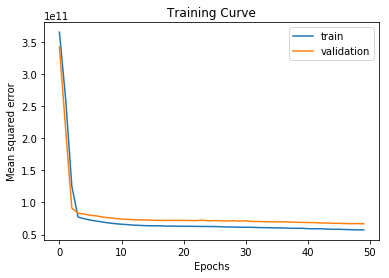

In [17]:
import matplotlib.pyplot as plt

# plot loss during training
def plot_loss(hist):
    %matplotlib inline
    plt.title('Training Curve')
    plt.plot(hist.history['loss'], label='train')
    plt.plot(hist.history['val_loss'], label='validation')
    plt.xlabel("Epochs")
    plt.ylabel("Mean squared error")
    plt.legend()
    plt.show()

plot_loss(best_train)



### Standardize your features:
* Typically assumes normally distributed feature, shifting mean to 0 and standard deviation to 1
  - makes it so all features look and are scaled the same way
* In theory does not matter for neural networks
* In practice tends to matter for neural networks
* Scale if using:
    - Logistic regression
    - Support vector machines
    - Perceptrons
    - Neural networks
    - Principle component analysis
* Don't bother if using:
    - "Forest" methods
    - Naive Bayes

In [21]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
in_scaler = StandardScaler()

selected_feature_train = in_scaler.fit_transform(selected_feature_train)

selected_feature_val = in_scaler.fit_transform(selected_feature_val)
selected_feature_test = in_scaler.fit_transform(selected_feature_test)
#we want to use the same scale - could get different values for shift and division
# if we re-scaled for validation and test

print(np.mean(selected_feature_train[:,0]))
print(np.std(selected_feature_train[:,0]))


-1.5395092608135503e-17
1.0


Train on 18000 samples, validate on 2000 samples
Epoch 1/100
18000/18000 [==============================] - 1s 36us/step - loss: 416642480064.2845 - val_loss: 456229088657.4080
Epoch 2/100
18000/18000 [==============================] - 0s 11us/step - loss: 416148003953.7778 - val_loss: 455136606945.2801
Epoch 3/100
18000/18000 [==============================] - 0s 11us/step - loss: 414126007764.7645 - val_loss: 451867020886.0160
Epoch 4/100
18000/18000 [==============================] - 0s 11us/step - loss: 409518329823.2320 - val_loss: 445473458487.2960
Epoch 5/100
18000/18000 [==============================] - 0s 11us/step - loss: 401489618534.4000 - val_loss: 435227743223.8080
Epoch 6/100
18000/18000 [==============================] - 0s 12us/step - loss: 389485163621.0347 - val_loss: 420833394425.8560
Epoch 7/100
18000/18000 [==============================] - 0s 11us/step - loss: 373262962363.9609 - val_loss: 402034979766.2720
Epoch 8/100
18000/18000 [==============================

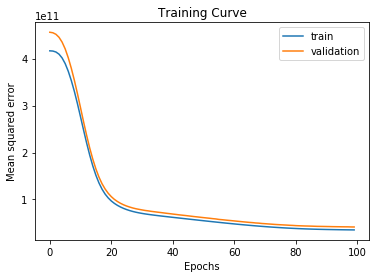

In [22]:
model = nn_model()

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(selected_feature_train, price_train,
            epochs=100, batch_size=128,
            validation_data=(selected_feature_val, price_val))
model_score = score(model.predict(selected_feature_val), price_val)
print(model_score)

plot_loss(history)

#### In the future, consider standardizing outputs as well
This will get rid of all the noise caused by very narrow valleys - it'll transform it into a parabolic basin

### Regularize:
* Heavily parameterized models like neural networks are prone to overfitting
* Popular off-the-shelf tools exist to regularize models and prevent overfitting: (basically prove that you're not doing it)
    - L2 regularization (weight decay)
    - Dropout
    - Batch normalization
    
#### These tools come as standard Keras/TF layers!
Add them randomly in between your layers to reduce overfitting.
This should reduce the spread between your validation and training and testing errors.

`model.add(keras.layers.Dropout(rate)`
`model.add(keras.layers.ActivityRegularization(l1=0.0, l2=0.0)`
`model.add(keras.layers.BatchNormalization())`

### Early stopping and model checkpointing:
#### It's unlikely the last iteration is the best, and who knows how long until the thing is converged. Just grab the best validation error.

Basically, we don't know how much it's bouncing around, and we don't know how long it'll take before it converges. So, we have the machine go on forever until it decides it's good enough to stop, and then we have it save the BEST model (not necessarily the last)

Train on 18000 samples, validate on 2000 samples
Epoch 1/300
18000/18000 [==============================] - 1s 37us/step - loss: 416651531110.1725 - val_loss: 456262317768.7040

Epoch 00001: val_loss improved from inf to 456262317768.70398, saving model to best_model.h5
Epoch 2/300
18000/18000 [==============================] - 0s 11us/step - loss: 416208827070.6915 - val_loss: 455239381286.9120

Epoch 00002: val_loss improved from 456262317768.70398 to 455239381286.91199, saving model to best_model.h5
Epoch 3/300
18000/18000 [==============================] - 0s 11us/step - loss: 414312701769.9555 - val_loss: 452138146463.7440

Epoch 00003: val_loss improved from 455239381286.91199 to 452138146463.74402, saving model to best_model.h5
Epoch 4/300
18000/18000 [==============================] - 0s 11us/step - loss: 409837442374.7698 - val_loss: 445894139052.0320

Epoch 00004: val_loss improved from 452138146463.74402 to 445894139052.03198, saving model to best_model.h5
Epoch 5/300
18000/

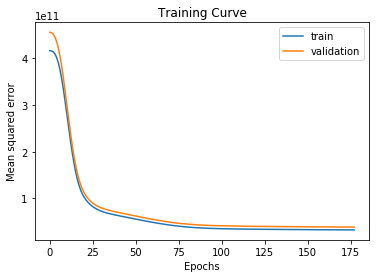

In [24]:
# Set callback functions to early stop training and save the 
# best model so far
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [EarlyStopping(monitor='val_loss', patience=5), #patience = how many iterations without improvement before it just stops
             ModelCheckpoint(filepath='best_model.h5',
                             monitor='val_loss',
                             save_best_only=True,
                             verbose=1)]

model = nn_model(nodes=50)
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(selected_feature_train, price_train,
                   epochs=300, callbacks=callbacks, batch_size=128,
                   validation_data=(selected_feature_val, price_val))
model_score = score(model.predict(selected_feature_val), price_val)
print(f"Model score: {model_score}")
plot_loss(history)

### You don't have to remember these resources because they're here when you need them
https://www.tensorflow.org/api_docs

https://keras.io/

https://www.tensorflow.org/tutorials/

https://www.google.com

### Don't trust me, trust your validation errors
### Don't look at your test set until you're actually going to test